**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import MinMaxScaler
from sklearn                 import metrics

# import data 2C_weka.csv for 2 Class Classifcation.


In [2]:
c2_df = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [3]:
c2_df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
c2_df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
c2_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [6]:
print(c2_df.isnull().sum())
print("\033[94m\033[1mTotal number of missing values=\x1b[0m", c2_df.isnull().sum().sum())

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
Total number of missing values= 0


In [7]:
c2_df.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [8]:
c2_df.groupby(["class"]).mean()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572


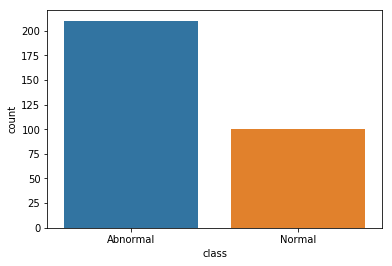

In [9]:
sns.countplot(x='class', data = c2_df)

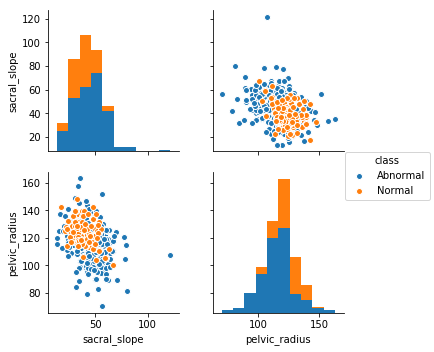

In [10]:
sns.pairplot(c2_df , hue = "class", vars=['sacral_slope','pelvic_radius'])

# Encode the Class variable to integer.

In [11]:
unique_class = c2_df['class'].unique()
print("\033[94m\033[1mClassifcations in the class variable:\x1b[0m")
for i,each in enumerate(unique_class,start=0):
    print ("{}. {} ".format(i,each))

Classifcations in the class variable:
0. Abnormal 
1. Normal 


In [12]:
int_make = LabelEncoder()
c2_df['class'] = int_make.fit_transform(c2_df['class'])
c2_df.sample(2)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
80,77.106571,30.469994,69.480628,46.636577,112.151600,70.759083,0
248,47.319648,8.573680,35.560252,38.745967,120.576972,1.630664,1


In [13]:
c2_df.groupby(["class"]).mean()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
0,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705
1,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572


In [14]:
print("\033[94m\033[1mData type after encodeed the Class variable to integer:\x1b[0m", c2_df["class"].dtypes)

Data type after encodeed the Class variable to integer: int64


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [15]:
c2_feature_df = c2_df.drop(labels= "class" , axis = 1)
c2_feature_df.head(1)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.2544


In [16]:
c2_labels = c2_df["class"]

# Normalize your Data (X) to get values between 0 to 1.

In [17]:
normalize = MinMaxScaler(copy=True, feature_range=(0, 1))
normalize.fit(c2_feature_df)
X = normalize.transform(c2_feature_df)
print("\033[94m\033[1mX.shape :\x1b[0m",X.shape)

X.shape : (310, 6)


In [18]:
y = np.array(c2_labels)
print("\033[94m\033[1my.shape :\x1b[0m",y.shape)

y.shape : (310,)


# Split the dat as train and test with a ratio of 70:30.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [20]:
print("\033[94m\033[1mX_train.shape :\x1b[0m",X_train.shape)
print("\033[94m\033[1mX_test.shape  :\x1b[0m",X_test.shape)
print("\033[94m\033[1my_train.shape :\x1b[0m",y_train.shape)
print("\033[94m\033[1my_test.shape  :\x1b[0m",y_test.shape)

X_train.shape : (217, 6)
X_test.shape  : (93, 6)
y_train.shape : (217,)
y_test.shape  : (93,)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [21]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [22]:
predicted_labels = NNH.predict(X_test)

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [23]:
print("\033[94m\033[1mPerformance Score =\x1b[0m",round(NNH.score(X_test, y_test),4))

Performance Score = 0.7527


In [24]:
print("\033[94m\033[1mConfusion Matrix :\x1b[0m")
print(metrics.confusion_matrix(y_test, predicted_labels))

Confusion Matrix :
[[51 15]
 [ 8 19]]


# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [25]:
k_range =list(range(1,int(np.sqrt(len(y_train))+1))) 
    #Should not be too small or too large. Thumb rule is max k = sqrt(n of Train Dataset)+1
for odd in k_range: 
    if odd % 2 == 0 : #K value should be odd
        k_range.remove(odd)
for notmultiple in k_range: 
    if notmultiple % len(c2_df["class"].unique()) == 0 : #K value must not be multiples of the number of classes
        k_range.remove(notmultiple)

In [26]:
P_Score = []
for k in k_range:
    NNH = KNeighborsClassifier(n_neighbors = k , weights = 'distance' )
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    Score = NNH.score(X_test, y_test)
    P_Score.append([k,round(Score,4)])
P_Score_df= pd.DataFrame({'K': [i[0] for i in P_Score],'Performance Score': [i[1] for i in P_Score] })
print("\033[94m\033[1mPerformance Scores of k:\x1b[0m")
print(P_Score_df)

Performance Scores of k:
    K  Performance Score
0   1             0.7634
1   3             0.7527
2   5             0.7527
3   7             0.7527
4   9             0.7419
5  11             0.7742
6  13             0.7742


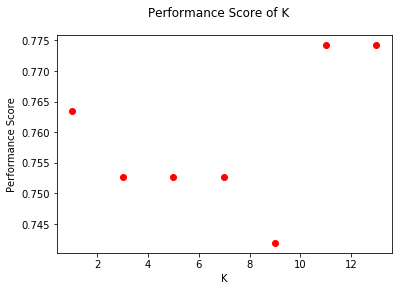

In [27]:
plt.plot(P_Score_df['K'], P_Score_df['Performance Score'], 'bo',color='r')
plt.suptitle('Performance Score of K')
plt.xlabel('K')
plt.ylabel('Performance Score')
plt.show()

In [28]:
print("\033[94m\033[1mBest K value for this(2 Class) classifcation problem =\x1b[0m",
      min(P_Score_df['K'].loc[ (P_Score_df['Performance Score']) == (max(P_Score_df['Performance Score']))]))

Best K value for this(2 Class) classifcation problem = 11


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [29]:
c3_df = pd.read_csv("3Classdata.csv")

In [30]:
c3_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [31]:
c3_df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [32]:
c3_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [33]:
print(c3_df.isnull().sum())
print("\033[94m\033[1mTotal number of missing values=\x1b[0m", c3_df.isnull().sum().sum())

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64
Total number of missing values= 0


In [34]:
c3_df.dtypes

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [35]:
c3_df.groupby(["class"]).mean()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
Normal,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
Spondylolisthesis,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


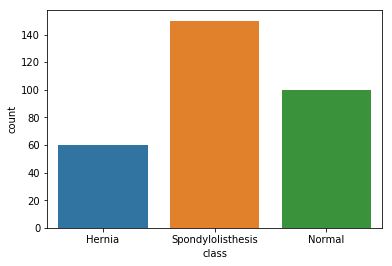

In [36]:
sns.countplot(x='class', data = c3_df)

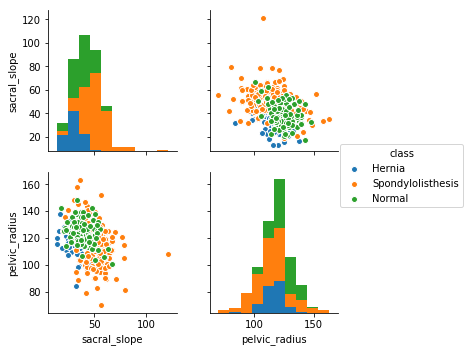

In [37]:
sns.pairplot(c3_df , hue = "class", vars=['sacral_slope','pelvic_radius'])

In [38]:
unique_class = c3_df['class'].unique()
print("\033[94m\033[1mClassifcations in the class variable:\x1b[0m")
for i,each in enumerate(unique_class,start=0):
    print ("{}. {} ".format(i,each))
int_make = LabelEncoder()
c3_df['class'] = int_make.fit_transform(c3_df['class'])
c3_df.sample(5)

Classifcations in the class variable:
0. Hernia 
1. Spondylolisthesis 
2. Normal 


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
109,68.613001,15.082235,63.014696,53.530766,123.431174,39.497987,2
260,54.142408,11.935110,43.000000,42.207298,122.209083,0.153549,1
183,71.001941,37.515772,84.537093,33.486169,125.164232,67.771190,2
96,96.657315,19.461581,90.211498,77.195734,120.673041,64.080998,2
196,63.772391,12.763385,65.360524,51.009006,89.822741,55.995454,2


In [39]:
c3_df.groupby(["class"]).mean()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
0,47.638407,17.398795,35.463524,30.239612,116.474968,2.480251
1,51.685244,12.821414,43.542605,38.863830,123.890834,2.186572
2,71.514224,20.748038,64.110108,50.766186,114.518810,51.896687


In [40]:
print("\033[94m\033[1mData type after encodeed the Class variable to integer:\x1b[0m", c3_df["class"].dtypes)

Data type after encodeed the Class variable to integer: int64


In [41]:
c3_feature_df = c3_df.drop(labels= "class" , axis = 1)
c3_feature_df.head(1)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.2544


In [42]:
c3_labels = c3_df["class"]

In [43]:
normalize = MinMaxScaler(copy=True, feature_range=(0, 1))
normalize.fit(c3_feature_df)
X = normalize.transform(c3_feature_df)
y = np.array(c3_labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print("\033[94m\033[1mX.shape :\x1b[0m",X.shape)
print("\033[94m\033[1my.shape :\x1b[0m",y.shape)
print("\033[94m\033[1mX_train.shape :\x1b[0m",X_train.shape)
print("\033[94m\033[1mX_test.shape  :\x1b[0m",X_test.shape)
print("\033[94m\033[1my_train.shape :\x1b[0m",y_train.shape)
print("\033[94m\033[1my_test.shape  :\x1b[0m",y_test.shape)

X.shape : (310, 6)
y.shape : (310,)
X_train.shape : (217, 6)
X_test.shape  : (93, 6)
y_train.shape : (217,)
y_test.shape  : (93,)


In [44]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [45]:
predicted_labels = NNH.predict(X_test)
print("\033[94m\033[1mPerformance Score =\x1b[0m",round(NNH.score(X_test, y_test),4))
print("\033[94m\033[1mConfusion Matrix :\x1b[0m")
print(metrics.confusion_matrix(y_test, predicted_labels))

Performance Score = 0.7097
Confusion Matrix :
[[ 9  6  2]
 [ 7 18  2]
 [ 2  8 39]]


In [46]:
k_range =list(range(1,int(np.sqrt(len(y_train))+1))) 
    #Should not be too small or too large. Thumb rule is max k = sqrt(n of Train Dataset)+1
for odd in k_range: 
    if odd % 2 == 0 : #K value should be odd
        k_range.remove(odd)
for notmultiple in k_range: 
    if notmultiple % len(c3_df["class"].unique()) == 0 : #K value must not be multiples of the number of classes
        k_range.remove(notmultiple)

In [47]:
P_Score = []
for k in k_range:
    NNH = KNeighborsClassifier(n_neighbors = k , weights = 'distance' )
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    Score = NNH.score(X_test, y_test)
    P_Score.append([k,round(Score,4)])
P_Score_df= pd.DataFrame({'K': [i[0] for i in P_Score],'Performance Score': [i[1] for i in P_Score] })
print("\033[94m\033[1mPerformance Scores of k:\x1b[0m")
print(P_Score_df)

Performance Scores of k:
    K  Performance Score
0   1             0.6882
1   5             0.7097
2   7             0.7097
3  11             0.7312
4  13             0.7634


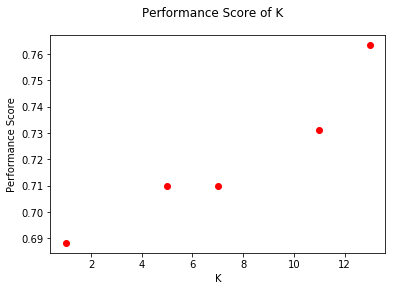

In [48]:
plt.plot(P_Score_df['K'], P_Score_df['Performance Score'], 'bo',color='r')
plt.suptitle('Performance Score of K')
plt.xlabel('K')
plt.ylabel('Performance Score')
plt.show()

In [49]:
print("\033[94m\033[1mBest K value for this (3 Class) classifcation problem =\x1b[0m",
      min(P_Score_df['K'].loc[ (P_Score_df['Performance Score']) == (max(P_Score_df['Performance Score']))]))

Best K value for this (3 Class) classifcation problem = 13
